In [1]:
import pandas as pd
df= pd.read_csv("Datasets/FinalDiabetesDataset(Corr).csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,195,33.6,0.627,50,1
1,1,85,66,29,195,26.6,0.351,31,0
2,8,183,64,32,195,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Applying ML Classification models on Dataset.
>* __Logistic Regression__
>* __Decision Tree Classifier__
>* __Random Forest Classifier__
>* __Support Vector Classifier__
>* __Naïve Bayes Classifier__
>* __K-Nearest Neighbor(KNN)__

__Note :__ _Dataset is Not normalized._

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [2]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(len(x_train),len(x_test))

2214 554


In [13]:
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2112,8,181.0,68,36,495,30.10,0.615,60
2581,4,112.0,78,40,182,39.40,0.236,38
1400,2,111.0,60,61,182,26.20,0.343,23
2663,1,79.0,75,30,182,32.00,0.396,22
1194,0,94.0,56,61,182,32.19,0.256,25


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100000)
lr_model.fit(x_train,y_train)
print("Training Score : ",lr_model.score(x_train,y_train))
import joblib
joblib.dump(lr_model,"LR.pkl")

Training Score :  0.7714543812104788


['LR.pkl']

In [6]:
def testAccuracy(model):
    import seaborn as sn
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix,classification_report
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(5,3))
    sn.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print(classification_report(y_test,y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       364
           1       0.68      0.54      0.60       190

    accuracy                           0.76       554
   macro avg       0.73      0.71      0.71       554
weighted avg       0.75      0.76      0.75       554



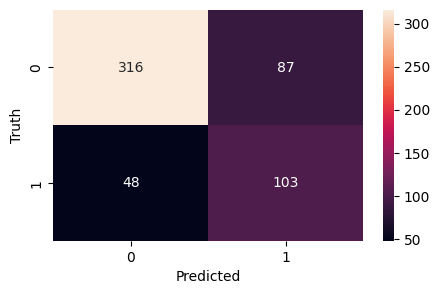

In [15]:
testAccuracy(lr_model)

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print("Training Score : ",dt_model.score(x_train,y_train))
import joblib
joblib.dump(dt_model,"DT.pkl")

Training Score :  1.0


['DT.pkl']

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       364
           1       0.99      0.98      0.99       190

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



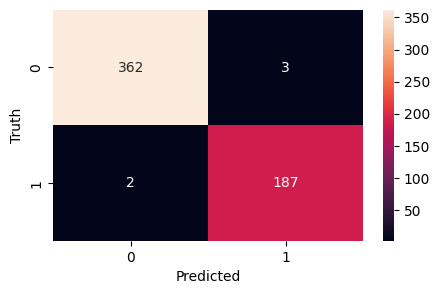

In [7]:
testAccuracy(dt_model)

## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
print("Training Score : ",rf_model.score(x_train,y_train))
import joblib
joblib.dump(rf_model,"RF.pkl")

Training Score :  1.0


['RF.pkl']

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       364
           1       1.00      0.99      0.99       190

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



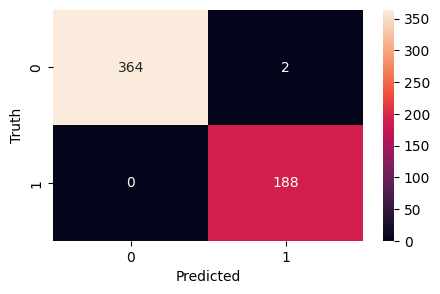

In [19]:
testAccuracy(rf_model)

## Support Vector Classifier

In [4]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model.fit(x_train,y_train)
print("Training Score : ",sv_model.score(x_train,y_train))
import joblib
joblib.dump(sv_model,"SVM.pkl")

Training Score :  0.7705510388437218


['SVM.pkl']

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       364
           1       0.70      0.49      0.58       190

    accuracy                           0.75       554
   macro avg       0.73      0.69      0.70       554
weighted avg       0.75      0.75      0.74       554



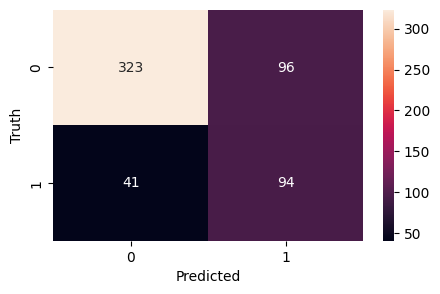

In [7]:
testAccuracy(sv_model)

## Naïve Bayes Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
print("Training Score : ",nb_model.score(x_train,y_train))
import joblib
joblib.dump(nb_model,"NB.pkl")

Training Score :  0.7637759710930443


['NB.pkl']

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       364
           1       0.64      0.62      0.63       190

    accuracy                           0.75       554
   macro avg       0.72      0.72      0.72       554
weighted avg       0.75      0.75      0.75       554



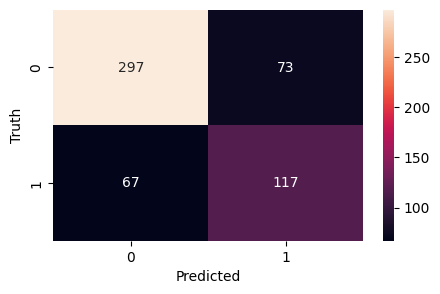

In [11]:
testAccuracy(nb_model)

## K-Nearest Neighbor(KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7) 
knn_model.fit(x_train, y_train)
print("Training Score : ",knn_model.score(x_train,y_train))
import joblib
joblib.dump(knn_model,"KNN.pkl")

Training Score :  0.8649503161698283


['KNN.pkl']

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       364
           1       0.76      0.71      0.73       190

    accuracy                           0.82       554
   macro avg       0.81      0.80      0.80       554
weighted avg       0.82      0.82      0.82       554



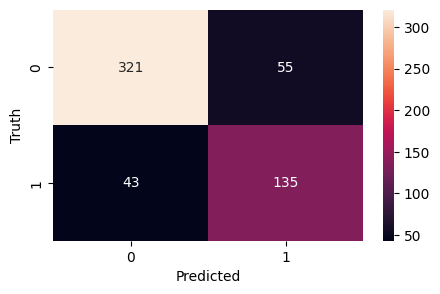

In [13]:
testAccuracy(knn_model)